<h1>Mini Project : Education & Career Success</h2>
<h2>Sandhya Anandan</h2>
<h3>Entri Elevate</h3>

<p><u>Objective:</u></p>
<p> The goal is to find how the Education impacts the career success, and predicts which course have higher chance in accquiring a job.</p>

<h5><u>Data Description:</u></h5>
<p>Source : https://www.kaggle.com/datasets/adilshamim8/education-and-career-success/code</p>
<p><u>Features:</u> </p>
<ul>
<li>Student_ID:
A unique identifier assigned to each student in the dataset.</li>
<li>Age:
The age of the student, ranging from 21 to 25 years old.</li>
<li>Gender:
The gender of the student, which can be Male, Female, or Other.</li>
<li>High_School_GPA:
The student's Grade Point Average (GPA) from high school, measured on a 4.0 scale.</li>
<li>SAT_Score:
The student's SAT standardized test score, ranging between 900 and 1600.</li>
<li>University_Ranking:
The ranking of the university attended by the student, ranging from 1 (highest) to 1000 (lowest).</li>
<li>University_GPA:
The GPA obtained by the student during university education, measured on a 4.0 scale.</li>
<li>Field_of_Study:
The student's major or discipline, such as Computer Science, Medicine, Business, Engineering, Arts, Law, or Mathematics.</li>
<li>Internships_Completed:
The number of internships completed by the student during their academic journey, ranging from 0 to 5.</li>
<li>Projects_Completed:
The number of academic or personal projects completed by the student, ranging from 0 to 10.</li>
<li>Certifications : The numbeer of certifications completed by student, ranging from 0 to 10</li>
<li>Soft_Skills_Score : The soft skill score ranging from 1 to 10</li>
<li>Networking_Score : The networking score ranging from 1-10</li>
<li>Job_Offers : The number of job offers received by student, ranging from 1 to 5</li>
<li>Starting_Salary: The starting salary obtained bys students in the field of study, ranging from 50000 to 130000</li>
<li>Career_Satisfaction : The career satisfaction rating obtained, ranging from 1 to 10</li>
<li>Years_to_Promotion : The number of years to promotion, ranging from 1 to 5</li>
<li>Current_Job_Level : The current job level varies from Entry, Mid, Senior</li>
<li>Work_Life_Balance : The average work-life balance ranges from 1 to 10</li>
<li>Entrepreneurship : A binary value to denote if the student opting for entrepreneurship.</li>
</ul>

In [3]:
#Imports
import pandas as pd
import numpy as np
import random

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

#SVC
from sklearn.svm import SVC




<h3>Data Collection</h3>


In [4]:

csv_df = pd.read_csv("./education_career_success.csv")
csv_df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S001,22,Male,3.8,1450,3.6,Computer Science,3,7,2,8,7,3,85000,8,2,Mid,7,No
1,S002,24,Female,3.6,1380,3.4,Business,2,5,3,7,6,2,65000,7,3,Mid,6,NaN
2,S003,21,Male,3.9,1520,3.8,Engineering,4,9,4,9,8,4,120000,9,1,Senior,6,NaN
3,S004,23,Female,3.5,1300,3.2,Psychology,1,3,1,6,5,1,48000,6,4,Entry,8,NaN
4,S005,25,Male,3.7,1420,3.5,Medicine,2,6,2,8,7,3,95000,8,2,Mid,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,S396,22,Female,3.7,1420,3.5,Business,3,7,3,8,7,NAN,NAN,NAN,2,Mid,7,No
396,S397,24,Male,3.5,1300,3.3,Law,2,6,2,7,6,NAN,NAN,NAN,4,Mid,6,No
397,S398,23,Female,3.9,1560,3.9,Computer Science,4,9,5,10,9,NAN,NAN,NAN,1,Senior,5,No
398,S399,21,Male,3.6,1360,3.4,Psychology,2,5,2,8,7,NAN,NAN,NAN,3,Mid,6,No


<h3>Data Preprocessing - FInding Missing & Unique Values</h3>

In [5]:
#Summary of each columns  : Unique , Missing values if any

for i in csv_df.columns :
  #if any NAN values convert them to numpy NAN for dataframe to recognize them as null
  csv_df.loc[csv_df[i] == 'NAN',i] = np.nan

  print(f"Column : {i}")
  print(f"Column data type : {csv_df[i].dtype}")
  print(f"Number of unique values : {csv_df[i].nunique()}")
  print(csv_df[i].unique())
  print(f"Number of missing values : {csv_df[i].isna().sum()} ({csv_df[i].isna().mean():.2%})")
  print("--" *60)

Column : Student_ID
Column data type : object
Number of unique values : 400
['S001' 'S002' 'S003' 'S004' 'S005' 'S006' 'S007' 'S008' 'S009' 'S010'
 'S011' 'S012' 'S013' 'S014' 'S015' 'S016' 'S017' 'S018' 'S019' 'S020'
 'S021' 'S022' 'S023' 'S024' 'S025' 'S026' 'S027' 'S028' 'S029' 'S030'
 'S031' 'S032' 'S033' 'S034' 'S035' 'S036' 'S037' 'S038' 'S039' 'S040'
 'S041' 'S042' 'S043' 'S044' 'S045' 'S046' 'S047' 'S048' 'S049' 'S050'
 'S051' 'S052' 'S053' 'S054' 'S055' 'S056' 'S057' 'S058' 'S059' 'S060'
 'S061' 'S062' 'S063' 'S064' 'S065' 'S066' 'S067' 'S068' 'S069' 'S070'
 'S071' 'S072' 'S073' 'S074' 'S075' 'S076' 'S077' 'S078' 'S079' 'S080'
 'S081' 'S082' 'S083' 'S084' 'S085' 'S086' 'S087' 'S088' 'S089' 'S090'
 'S091' 'S092' 'S093' 'S094' 'S095' 'S096' 'S097' 'S098' 'S099' 'S100'
 'S101' 'S102' 'S103' 'S104' 'S105' 'S106' 'S107' 'S108' 'S109' 'S110'
 'S111' 'S112' 'S113' 'S114' 'S115' 'S116' 'S117' 'S118' 'S119' 'S120'
 'S121' 'S122' 'S123' 'S124' 'S125' 'S126' 'S127' 'S128' 'S129' 'S130'
 

<h3>Data Preprocessing --> 1. Handling Inconsistencies</h3>

In [6]:
#Converting all the integer columns to Int datatype to avoid any inconsistent values.

intCols = ['Age', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion', 'Entrepreneurship']
for i in intCols :
  csv_df[i] = pd.to_numeric(csv_df[i], errors='coerce').astype('Int64')
  print(f"'{i}' Column data type : {csv_df[i].dtype}")
  print(f"Number of unique values : {csv_df[i].nunique()}")
  print(csv_df[i].unique())
  print(f"Number of missing values : {csv_df[i].isna().sum()} ({csv_df[i].isna().mean():.2%})")
  print("--" *60)

print(csv_df.info())


'Age' Column data type : Int64
Number of unique values : 6
<IntegerArray>
[22, 24, 21, 23, 25, <NA>, 0]
Length: 7, dtype: Int64
Number of missing values : 16 (4.00%)
------------------------------------------------------------------------------------------------------------------------
'Internships_Completed' Column data type : Int64
Number of unique values : 5
<IntegerArray>
[3, 2, 4, 1, 0, <NA>]
Length: 6, dtype: Int64
Number of missing values : 26 (6.50%)
------------------------------------------------------------------------------------------------------------------------
'Projects_Completed' Column data type : Int64
Number of unique values : 8
<IntegerArray>
[7, 5, 9, 3, 6, 4, 2, 8, <NA>]
Length: 9, dtype: Int64
Number of missing values : 51 (12.75%)
------------------------------------------------------------------------------------------------------------------------
'Certifications' Column data type : Int64
Number of unique values : 6
<IntegerArray>
[2, 3, 4, 1, 0, 5, <NA>]
Le

<h3>Data Preprocessing --> 2. Handling Missing values </h3>

In [7]:
#Find the missing and inappropriate values, treat them appropriately.
for i in csv_df.columns :
  print(f"Column : {i}")
  if csv_df[i].isna().sum() > 0:
    print(f"BEFORE : Number of missing values : {csv_df[i].isna().sum()} ({csv_df[i].isna().mean():.2%})")

    if i == 'Gender':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.choice(['Male', 'Female', 'Other' ]))
    elif i == 'Age':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else int(csv_df['Age'].mean()))
      csv_df[i] = csv_df[i].apply(lambda x: x if x != 0 else int(csv_df['Age'].mean())) # replacinng 0's if any for age column
    elif i == 'Field_of_Study':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.choice(['Computer Science', 'Business', 'Engineering', 'Psychology', 'Medicine', 'Education', 'Arts', 'Law', 'Finance', 'Marketing', 'Nursing']))
    elif i == 'Internships_Completed' or i == 'Certifications' or i == 'Job_Offers':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.randint(0,5))
    elif i == 'Projects_Completed' or i == 'Soft_Skills_Score':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.randint(1,10))
    elif i == 'Networking_Score' or i == 'Career_Satisfaction':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.randint(5,10))
    elif i == 'Starting_Salary':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.randint(50000,140000))
    elif i == 'Entrepreneurship':
      csv_df[i] = csv_df[i].apply(lambda x: x if pd.notna(x) else random.randint(0,1))

    print(f"AFTER : Number of missing values : {csv_df[i].isna().sum()} ({csv_df[i].isna().mean():.2%})")
    print(csv_df[i].unique())
    print("--" *60)


#Convert all numerical columns to int again.
intCols = ['Age', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion', 'Entrepreneurship']
for i in intCols :
  csv_df[i] = pd.to_numeric(csv_df[i], errors='coerce').astype('Int64')
print(csv_df.info())


Column : Student_ID
Column : Age
BEFORE : Number of missing values : 16 (4.00%)
AFTER : Number of missing values : 0 (0.00%)
[22. 24. 21. 23. 25.]
------------------------------------------------------------------------------------------------------------------------
Column : Gender
BEFORE : Number of missing values : 35 (8.75%)
AFTER : Number of missing values : 0 (0.00%)
['Male' 'Female' 'Other']
------------------------------------------------------------------------------------------------------------------------
Column : High_School_GPA
Column : SAT_Score
Column : University_GPA
Column : Field_of_Study
BEFORE : Number of missing values : 93 (23.25%)
AFTER : Number of missing values : 0 (0.00%)
['Computer Science' 'Business' 'Engineering' 'Psychology' 'Medicine'
 'Education' 'Arts' 'Law' 'Finance' 'Marketing' 'Nursing']
------------------------------------------------------------------------------------------------------------------------
Column : Internships_Completed
BEFORE : Num

<h3>Data Preprocessing --> 3. Finding Outliers </h3>

In [8]:
#Understanding outliers
outCol = ['Age', 'High_School_GPA','SAT_Score', 'University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion', 'Work_Life_Balance']
for i in outCol:
  Q1 = csv_df[i].quantile(0.25)
  Q3 = csv_df[i].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = csv_df[(csv_df[i] < lower_bound) | (csv_df[i] > upper_bound)]

  # Count outliers
  outlier_count = outliers.shape[0]

  # Display results
  print(f"Column: {i}")
  print(f"Q1 (25th percentile): {Q1}")
  print(f"Q3 (75th percentile): {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower Bound: {lower_bound}")
  print(f"Upper Bound: {upper_bound}")
  print(f"Number of Outliers in {i}: {outlier_count}")
  if outlier_count > 0:
    print(outliers)
  print("--" *60)

Column: Age
Q1 (25th percentile): 22.0
Q3 (75th percentile): 24.0
IQR: 2.0
Lower Bound: 19.0
Upper Bound: 27.0
Number of Outliers in Age: 0
------------------------------------------------------------------------------------------------------------------------
Column: High_School_GPA
Q1 (25th percentile): 3.5
Q3 (75th percentile): 3.8
IQR: 0.2999999999999998
Lower Bound: 3.0500000000000003
Upper Bound: 4.25
Number of Outliers in High_School_GPA: 0
------------------------------------------------------------------------------------------------------------------------
Column: SAT_Score
Q1 (25th percentile): 1300.0
Q3 (75th percentile): 1480.0
IQR: 180.0
Lower Bound: 1030.0
Upper Bound: 1750.0
Number of Outliers in SAT_Score: 0
------------------------------------------------------------------------------------------------------------------------
Column: University_GPA
Q1 (25th percentile): 3.2
Q3 (75th percentile): 3.7
IQR: 0.5
Lower Bound: 2.45
Upper Bound: 4.45
Number of Outliers in Un

<h2>EDA</h2>

In [29]:
csv_df.info()
#csv_df['Age'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             400 non-null    object 
 1   Age                    400 non-null    Int64  
 2   Gender                 400 non-null    object 
 3   High_School_GPA        400 non-null    float64
 4   SAT_Score              400 non-null    float64
 5   University_GPA         400 non-null    float64
 6   Field_of_Study         400 non-null    object 
 7   Internships_Completed  400 non-null    Int64  
 8   Projects_Completed     400 non-null    Int64  
 9   Certifications         400 non-null    Int64  
 10  Soft_Skills_Score      400 non-null    Int64  
 11  Networking_Score       400 non-null    Int64  
 12  Job_Offers             400 non-null    Int64  
 13  Starting_Salary        400 non-null    Int64  
 14  Career_Satisfaction    400 non-null    Int64  
 15  Years_

<p>New Feature for Course Distribution Graph</p>

In [30]:
print(csv_df['Field_of_Study'].unique())

# STEM : Computer Science, Engineering, Medicine, Nursing
# Business & Economics : Business, Finance, Marketing
# Arts & Social Science: Arts, Psychology, Education, Law
csv_df['Study_Domain'] = csv_df['Field_of_Study'].apply(lambda x: 'STEM' if x == 'Computer Science' or x == 'Engineering' or x == 'Medicine' or x == 'Nursing' else ('Business & Economics' if x == 'Business' or x == 'Finance' or x == 'Marketing' else 'Arts & Social Science'))
print(csv_df['Study_Domain'].unique())
print(csv_df.head())

['Computer Science' 'Business' 'Engineering' 'Psychology' 'Medicine'
 'Education' 'Arts' 'Law' 'Finance' 'Marketing' 'Nursing']
['STEM' 'Business & Economics' 'Arts & Social Science']
  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_GPA  \
0       S001   22    Male              3.8     1450.0             3.6   
1       S002   24  Female              3.6     1380.0             3.4   
2       S003   21    Male              3.9     1520.0             3.8   
3       S004   23  Female              3.5     1300.0             3.2   
4       S005   25    Male              3.7     1420.0             3.5   

     Field_of_Study  Internships_Completed  Projects_Completed  \
0  Computer Science                      3                   7   
1          Business                      2                   5   
2       Engineering                      4                   9   
3        Psychology                      1                   3   
4          Medicine                      2     

<h3>Univariate Analysis</h3>

In [31]:
#Univariate Analysis

unicols = ['Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion']
for i in unicols:
  print(f"{i} Skewness:", csv_df[i].skew())
  print(f"{i} Kurtosis:", csv_df[i].kurt())
  print("-" * 20)

Internships_Completed Skewness: -0.27032867190965937
Internships_Completed Kurtosis: -0.6064364855761482
--------------------
Projects_Completed Skewness: -0.28585805814165266
Projects_Completed Kurtosis: -0.7151373674117041
--------------------
Certifications Skewness: 0.08962420883963056
Certifications Kurtosis: -0.6349991834139255
--------------------
Soft_Skills_Score Skewness: -1.191245987739417
Soft_Skills_Score Kurtosis: 1.5212805400160327
--------------------
Starting_Salary Skewness: 0.34184131656117417
Starting_Salary Kurtosis: -0.5997781361388905
--------------------
Career_Satisfaction Skewness: 0.03297285317326672
Career_Satisfaction Kurtosis: -0.9121616925706322
--------------------
Years_to_Promotion Skewness: 0.26878279856066795
Years_to_Promotion Kurtosis: -1.1257891853513742
--------------------


<h3>BiVariate Analysis</h3>

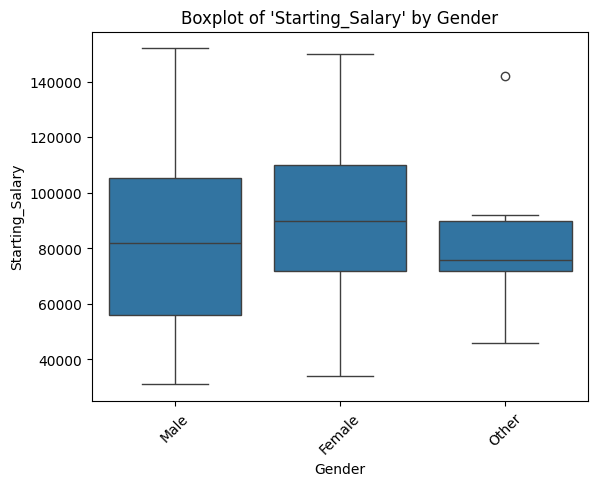

<Figure size 640x480 with 0 Axes>

            Study_Domain  Starting_Salary
0  Arts & Social Science          77962.7
1   Business & Economics          84334.4
2                   STEM    101431.225806


/tmp/ipython-input-2686066201.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Study_Domain', y='Starting_Salary', data=avg_salary, palette='pastel')


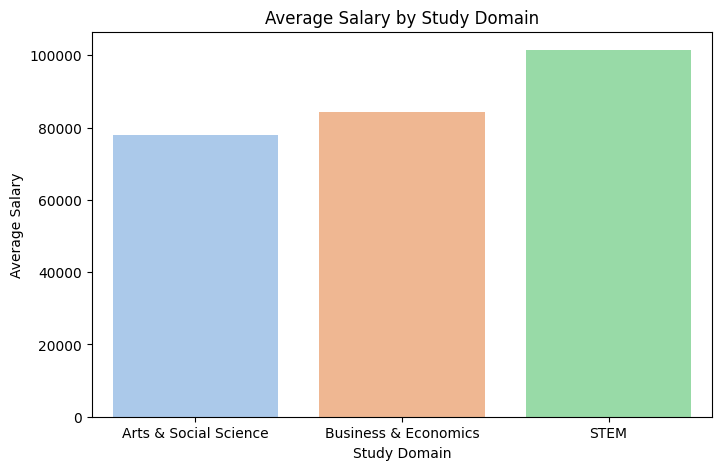

In [32]:
#BiVariate Analysis

#distribution of Gender across Starting Salary
sns.boxplot(data=csv_df,x='Gender', y='Starting_Salary')
plt.title(f"Boxplot of 'Starting_Salary' by Gender")
plt.xticks(rotation=45)
plt.show()

plt.tight_layout()
plt.show()

#Distribution of Study Domain across average salary
avg_salary = csv_df.groupby('Study_Domain')['Starting_Salary'].mean().reset_index()

print(avg_salary)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='Study_Domain', y='Starting_Salary', data=avg_salary, palette='pastel')
plt.title("Average Salary by Study Domain")
plt.ylabel("Average Salary")
plt.xlabel("Study Domain")
plt.show()

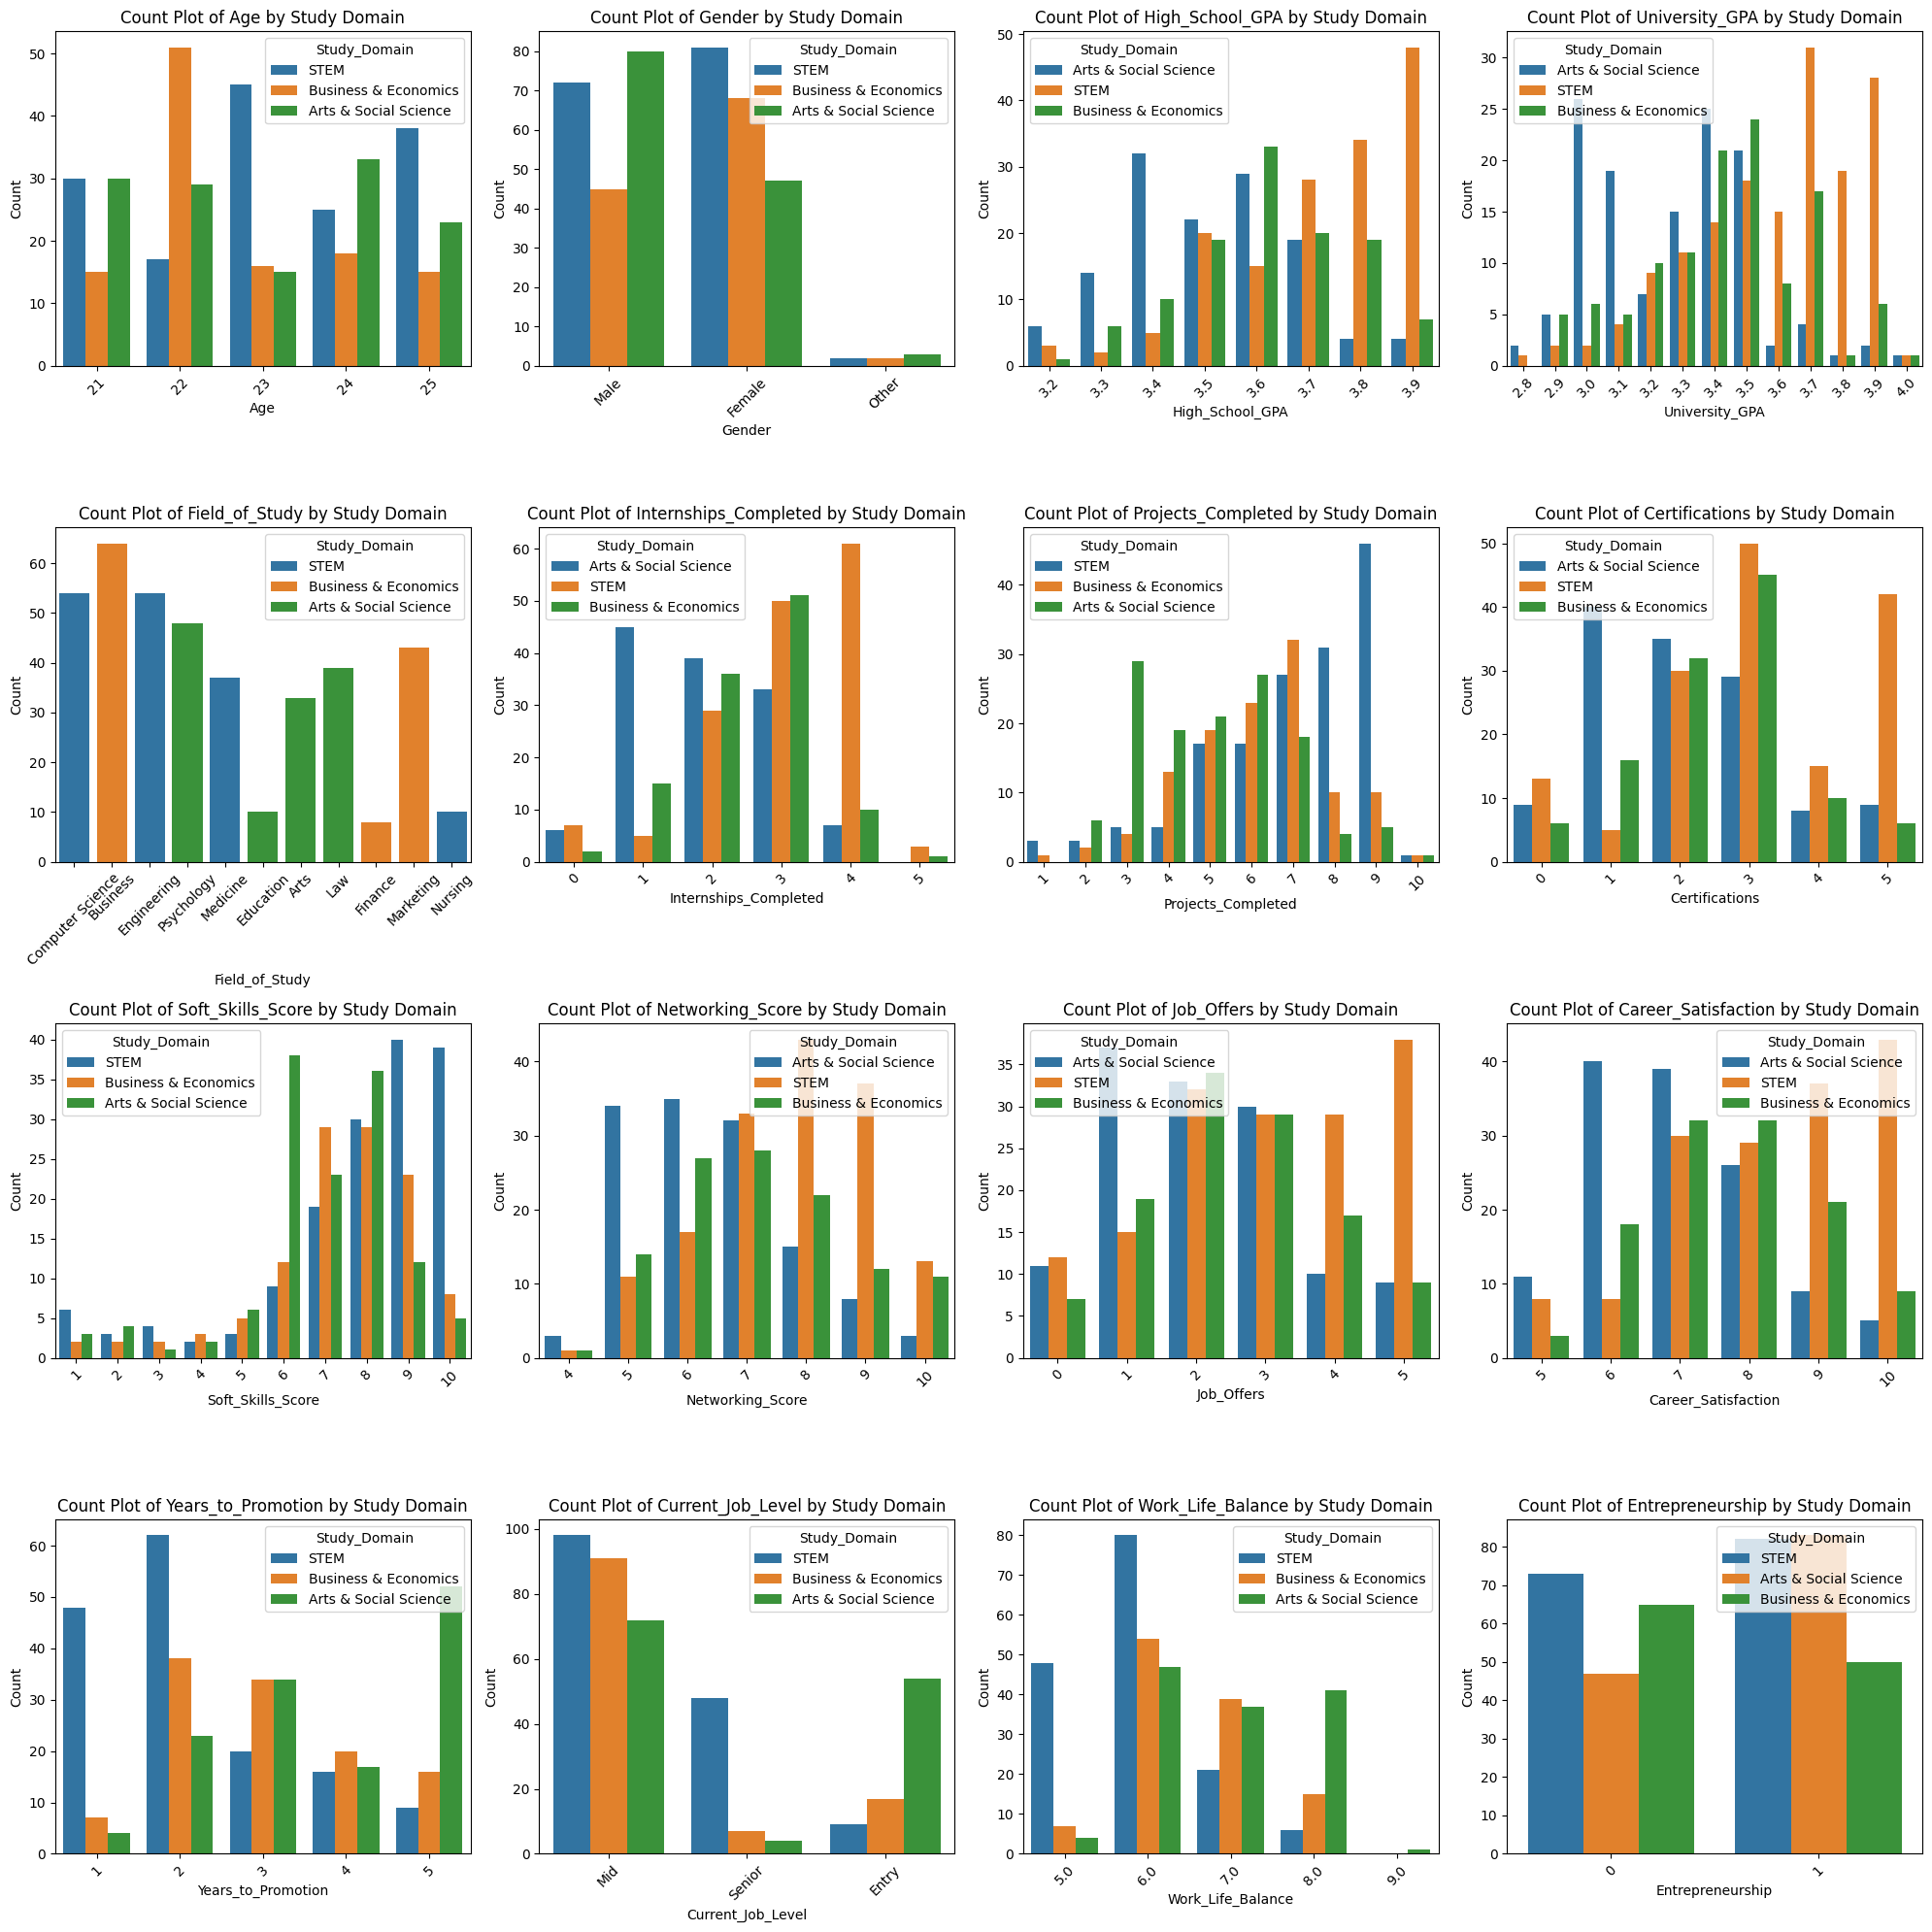

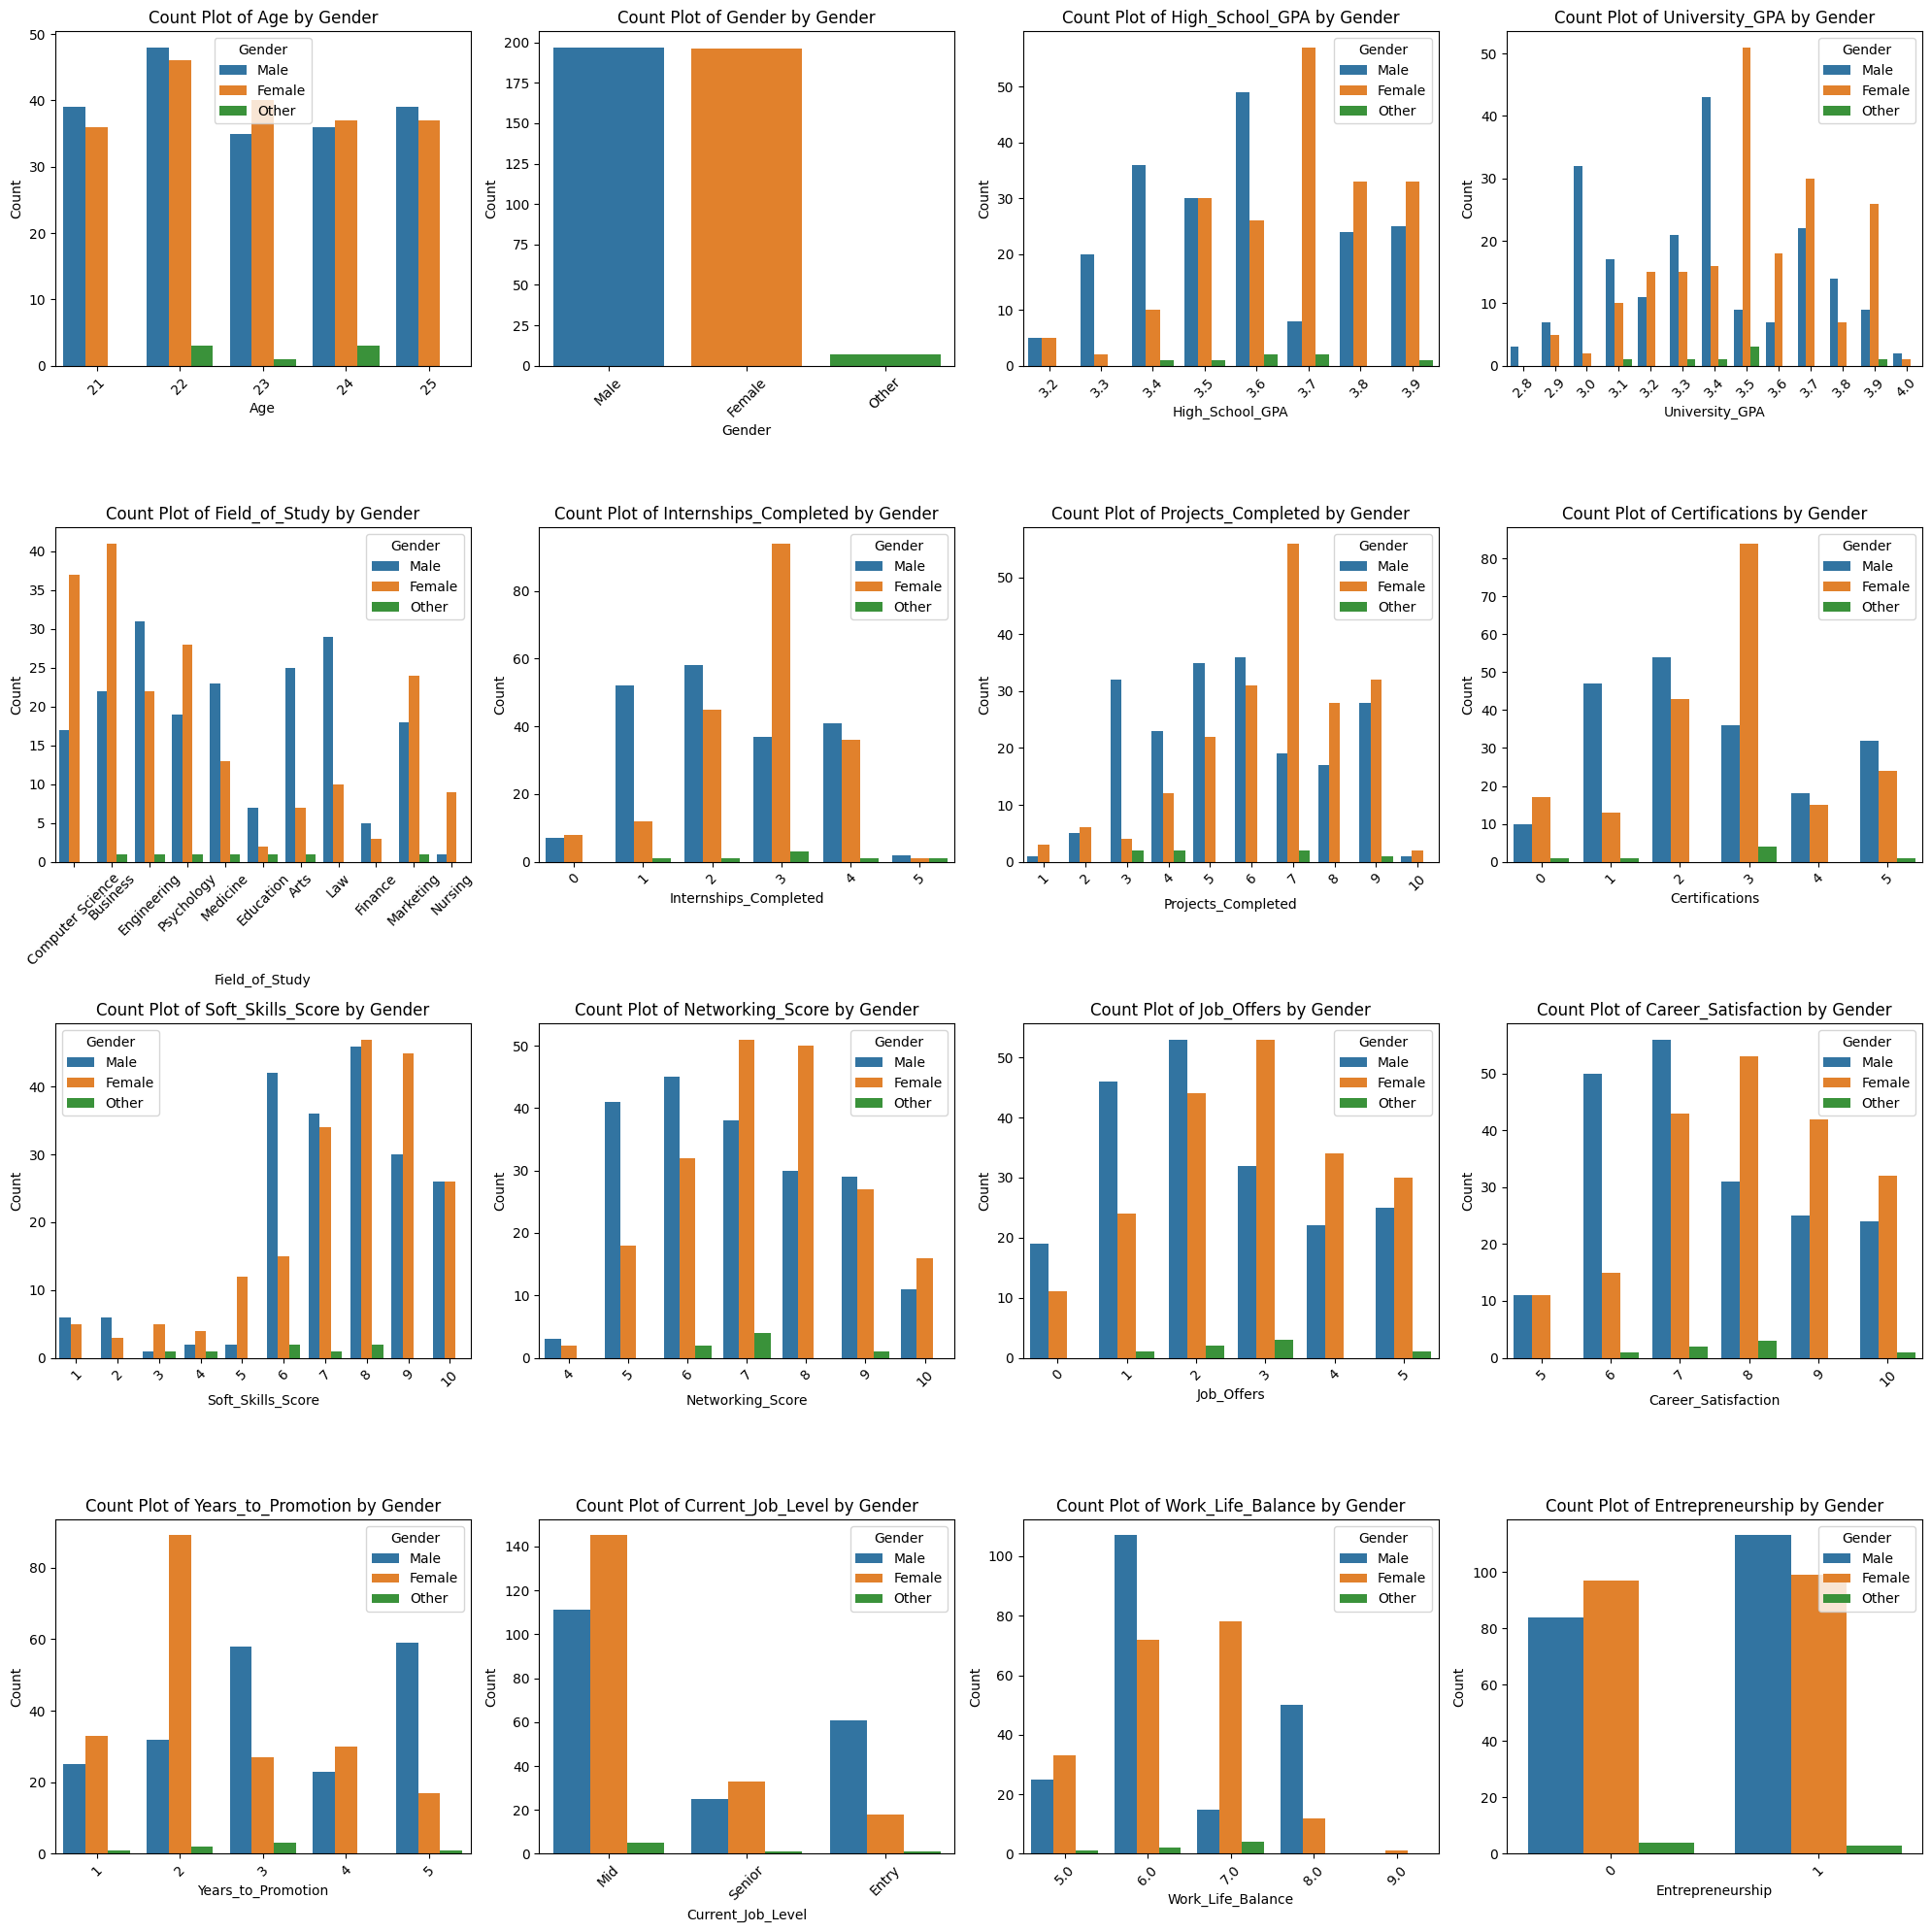

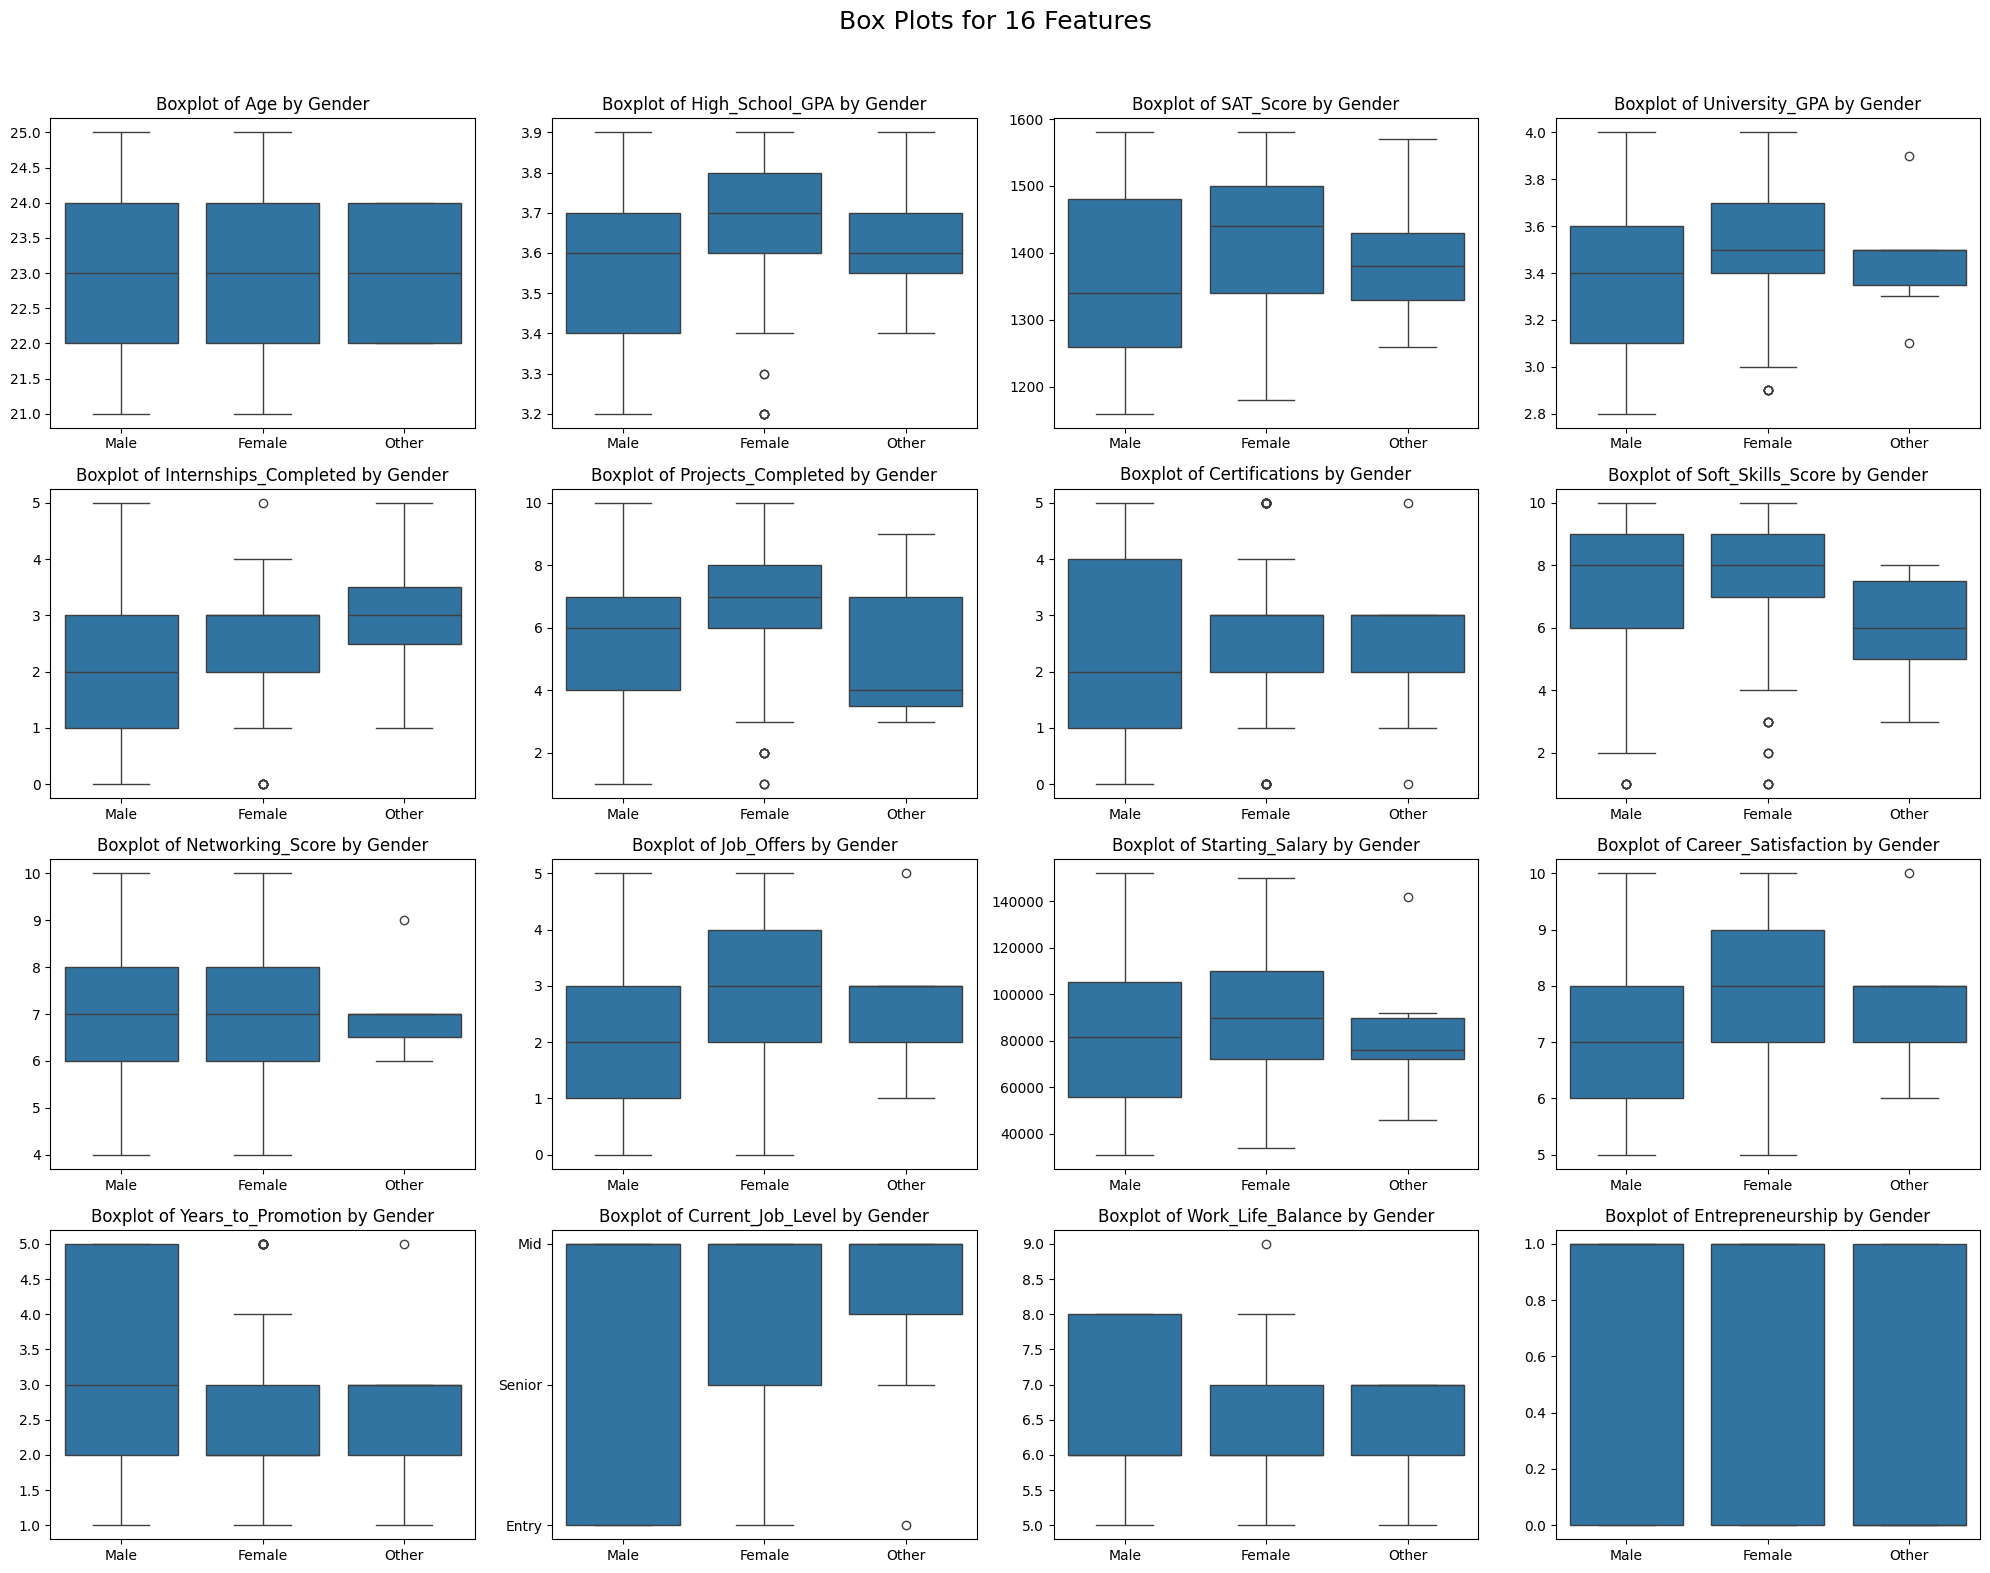

In [33]:

# Distribution Across Study_Domain
cols = ['Age', 'Gender', 'High_School_GPA', 'University_GPA', 'Field_of_Study', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Career_Satisfaction', 'Years_to_Promotion', 'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship']

plt.figure(figsize=(20, 20))

for i, col in enumerate(cols) :
    plt.subplot(4, 4, i + 1)   # 4x4 layout for 16 graphs
    sns.countplot(data=csv_df, x=col, hue='Study_Domain')
    plt.title(f'Count Plot of {col} by Study Domain')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Distribution Across Gender
plt.figure(figsize=(20, 20))

for i, col in enumerate(cols) :
    plt.subplot(4, 4, i + 1)   # 4x4 layout for 16 graphs
    sns.countplot(data=csv_df, x=col, hue='Gender')
    plt.title(f'Count Plot of {col} by Gender')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#Distribution Across Field_of_study
cols = ['Age', 'High_School_GPA', 'SAT_Score', 'University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion', 'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship']
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Box Plots for 16 Features', fontsize=18)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols) :
    sns.boxplot(data=csv_df,ax=axes[i],x='Gender', y=csv_df[col])
    axes[i].set_title(f"Boxplot of {col} by Gender")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

plt.show()


<h3> Logistic Regression </h3>

In [44]:
# Define target (Career Success: 1=Yes, 0=No)
csv_df['Career_Success'] = np.where(
    (csv_df['Starting_Salary'] >= 80000) &
    (csv_df['Career_Satisfaction'] >= 8) &
    (csv_df['Work_Life_Balance'] >= 7)
    , 1,0
).astype(int)

# Features
X = csv_df.drop(columns=['Career_Success','Student_ID','Field_of_Study', 'Years_to_Promotion'])
y = csv_df['Career_Success']

numeric_features = ['Age','High_School_GPA','SAT_Score','University_GPA',
                    'Internships_Completed','Projects_Completed','Certifications',
                    'Soft_Skills_Score','Networking_Score','Work_Life_Balance']

categorical_features = ['Gender','Study_Domain','Entrepreneurship']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# SVM pipeline (with RBF kernel)
svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log, zero_division=0))

# Fit SVM
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

print(log_reg.named_steps['classifier'].coef_)


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.00      0.00      0.00         4

    accuracy                           0.91        80
   macro avg       0.47      0.48      0.48        80
weighted avg       0.90      0.91      0.91        80

SVM Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.00      0.00      0.00         4

    accuracy                           0.95        80
   macro avg       0.47      0.50      0.49        80
weighted avg       0.90      0.95      0.93        80

[[-0.06456693  0.79451185  0.21833587  0.68243298  0.55766448  0.08569518
  -0.05271033  0.17374693  0.05774959  2.5789187   1.43170997 -1.21130701
  -0.22137165  0.41096613  0.33932519 -0.75126001  0.03138314 -0.03235183]]


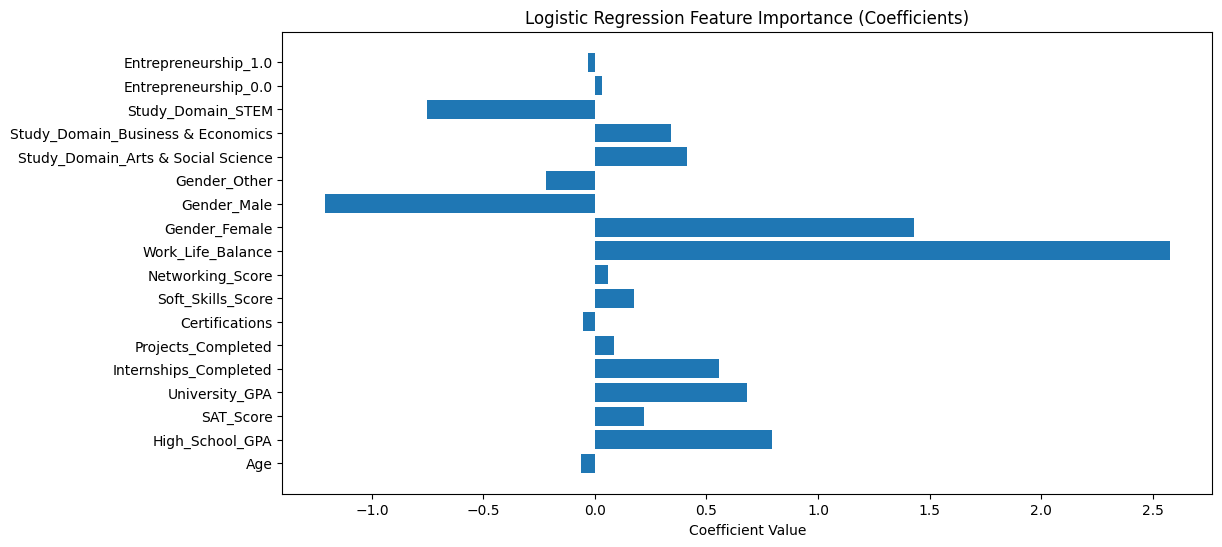

In [35]:
# Get feature names after preprocessing
feature_names = (log_reg.named_steps['preprocessor']
                 .transformers_[0][1]['scaler'].get_feature_names_out(numeric_features).tolist()
                 + log_reg.named_steps['preprocessor']
                 .transformers_[1][1]['encoder'].get_feature_names_out(categorical_features).tolist())

# Coefficients
coef = log_reg.named_steps['classifier'].coef_[0]

# Plot
plt.figure(figsize=(12,6))
plt.barh(feature_names, coef)
plt.title("Logistic Regression Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()


Insight:
Positive coefficients push towards Career Success = 1, negative coefficients push towards Career Success = 0


Permutation Importance

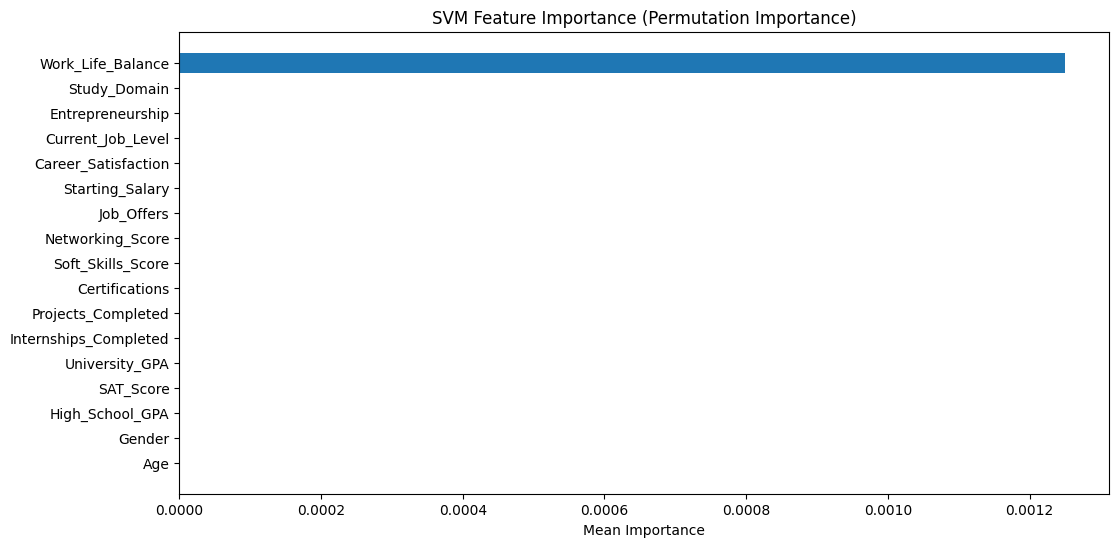

In [42]:
# Permutation importance for SVM
result = permutation_importance(svm_clf, X_test, y_test, n_repeats=10, random_state=42)

# Plot
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12,6))
plt.barh(np.array(X.columns)[sorted_idx], result.importances_mean[sorted_idx])
plt.title("SVM Feature Importance (Permutation Importance)")
plt.xlabel("Mean Importance")
plt.show()


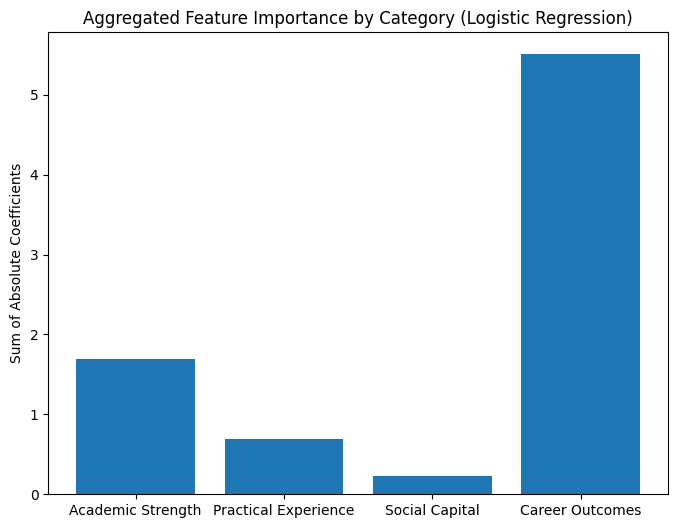

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Logistic Regression coefficients
coef = log_reg.named_steps['classifier'].coef_[0]
feature_names = (log_reg.named_steps['preprocessor']
                 .transformers_[0][1]['scaler'].get_feature_names_out(numeric_features).tolist()
                 + log_reg.named_steps['preprocessor']
                 .transformers_[1][1]['encoder'].get_feature_names_out(categorical_features).tolist())

importance_df = pd.DataFrame({'feature': feature_names, 'coef': coef})

# Define groups
groups = {
    'Academic Strength': ['High_School_GPA','SAT_Score','University_GPA'],
    'Practical Experience': ['Internships_Completed','Projects_Completed','Certifications'],
    'Social Capital': ['Soft_Skills_Score','Networking_Score'],
    'Career Outcomes': ['Work_Life_Balance','Gender','Field_Category','Entrepreneurship']
}

# Aggregate importance
group_importance = {}
for group, feats in groups.items():
    mask = importance_df['feature'].str.contains('|'.join(feats))
    group_importance[group] = importance_df.loc[mask, 'coef'].abs().sum()

# Plot
plt.figure(figsize=(8,6))
plt.bar(group_importance.keys(), group_importance.values())
plt.title("Aggregated Feature Importance by Category (Logistic Regression)")
plt.ylabel("Sum of Absolute Coefficients")
plt.show()

Insights from above
We’ll group features into interpretable categories:
 <p>Academic Strength</p>
- High_School_GPA
- SAT_Score
- University_GPA
<p>Practical Experience</p>
<ul><li>Internships_Completed</li>
<li>Projects_Completed</li>
<li>Certifications</li></ul>
<p>Social Capital</p>
<ul><li>Soft_Skills_Score</li>
<li>Networking_Score</li></ul>
<p>Career Outcomes (current state)</p>
<ul><li>Years_to_Promotion</li>
<li>Work_Life_Balance</li>
<li>Field_Category (STEM, Business & Economics, Arts & Social Science)</li>
<li>Gender, Entrepreneurship</li></ul>

Key Points
- Academic Strength → tells you how much grades and test scores matter.
- Practical Experience → shows the impact of internships, projects, certifications.
- Social Capital → highlights soft skills and networking.
- Career Outcomes → captures demographic and current job-related factors.
This aggregation makes your analysis holistic and actionable: instead of saying “SAT_Score has a coefficient of 0.3,” you can say “Academic Strength overall contributes 25% of predictive power.”

Insights :
- Academic Strength: Both models show high importance here, GPA and test scores are strong predictors.
- Practical Experience: Internships, projects, and certifications often matter more in SVM, since they interact non‑linearly with other features.
- Social Capital: Networking and soft skills may show moderate importance in Logistic Regression but can spike in SVM if they interact with job level or salary.
- Career Outcomes: This category (promotion speed, work‑life balance, demographics, field category) often dominates because it reflects current career trajectory.


Modal Evaluation  

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Logistic Regression predictions
y_pred_log = log_reg.predict(X_test)
mae_log = mean_absolute_error(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)

print("Logistic Regression MAE:", mae_log)
print("Logistic Regression MSE:", mse_log)

# SVM predictions
y_pred_svm = svm_clf.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print("SVM MAE:", mae_svm)
print("SVM MSE:", mse_svm)

Logistic Regression MAE: 0.0875
Logistic Regression MSE: 0.0875
SVM MAE: 0.05
SVM MSE: 0.05


- MAE → average absolute difference between predicted and actual labels.
- For binary classification, it’s equivalent to the error rate (fraction of misclassifications).
- MSE → penalizes larger errors more heavily.
- For binary classification, it’s similar to MAE but squares the error (so misclassifications count as 1 instead of absolute difference).

- Lower MAE/MSE = better model.


In [39]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameters
param_grid_log = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],  # 'l1' works with saga/liblinear
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_log.best_params_)
print("Best Logistic Regression Score:", grid_log.best_score_)

# SVM hyperparameters
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)


Best Logistic Regression Params: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Logistic Regression Score: 0.921875
Best SVM Params: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best SVM Score: 0.9375


For saving the model

In [40]:
import joblib

# Save Logistic Regression model
joblib.dump(log_reg, "logistic_regression_model.pkl")

# Save SVM model
joblib.dump(svm_clf, "svm_model.pkl")

# Load them back later
log_reg_loaded = joblib.load("logistic_regression_model.pkl")
svm_loaded = joblib.load("svm_model.pkl")